In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

---

## Reading data

In [2]:
df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx',sheet_name='Data')

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


---

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


- There is no missing values 

In [5]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## Feature Engineering 

In [6]:
# the ID feature is redundant corresponding to the index
df.drop('ID', inplace=True, axis=1)

In [7]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


---

## Feature transformation
Income here is annual while CCAvg is monthly

In [8]:
df['CCAvg'] = df['CCAvg'] * 12

<Axes: >

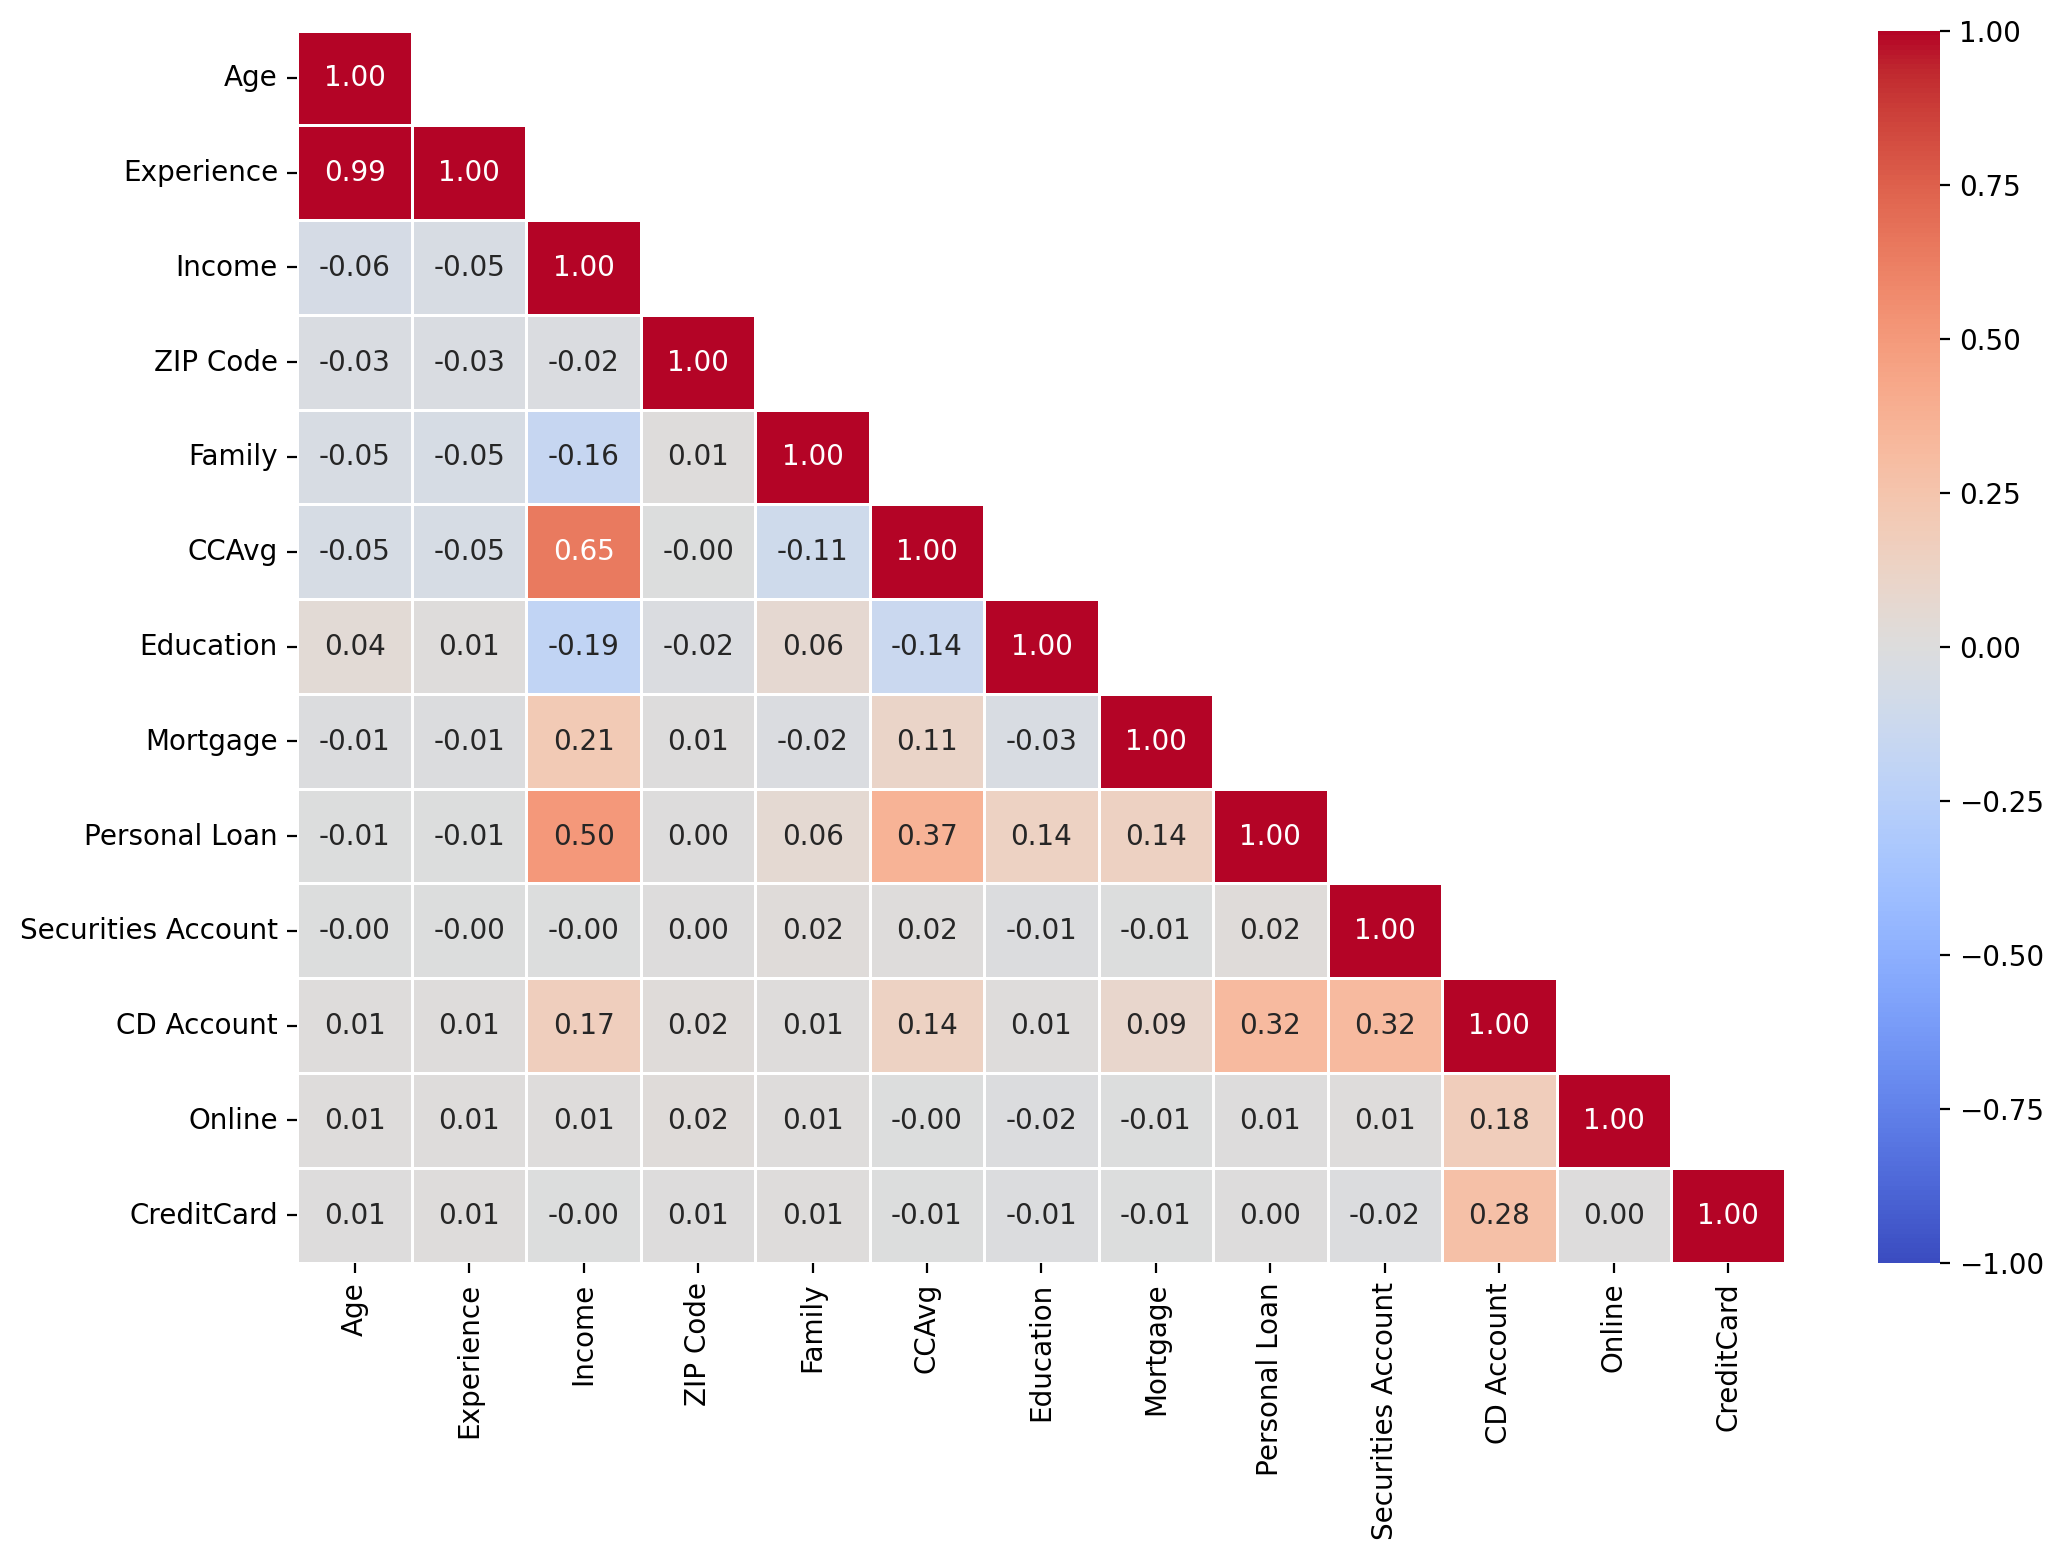

In [9]:
#correlation
plt.figure(figsize=(12,8), dpi=200)

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask,1)] = True

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask,
           vmin = -1, vmax = 1)

The 2 features Age and Experience are highly correlated(0.99), we sholud remove one of them

In [10]:
df.drop('Age', inplace=True, axis=1)

In [11]:
var = df.corr()['Personal Loan'].sort_values()

In [12]:
var

Experience           -0.007413
ZIP Code              0.000107
CreditCard            0.002802
Online                0.006278
Securities Account    0.021954
Family                0.061367
Education             0.136722
Mortgage              0.142095
CD Account            0.316355
CCAvg                 0.366891
Income                0.502462
Personal Loan         1.000000
Name: Personal Loan, dtype: float64

- The most correlated features with `Personal Loan` are:
    - Income
    - CCAVG
    - CD Account

---

## Dealing with noisy data

### noise is unwanted and wrong data and it should be removed.

There are features that must be positive values : `age`, `Experience`, `Family`

In [13]:
def check_for_noise(feature_name):
    negative_mask = df[feature_name] < 0
    negative_rows = df[negative_mask]
    cnt = negative_rows[feature_name].count()
    print(cnt)
    
    if (cnt > 0):
        display(negative_rows)
        df.drop(negative_rows.index, inplace=True)

In [14]:
check_for_noise('Experience')

52


,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,-1,113,94303,4,27.6,3,0,0,0,0,0,1
226,-1,39,94085,2,20.4,2,0,0,0,0,0,0
315,-2,51,90630,3,3.6,3,0,0,0,0,1,0
451,-2,48,94132,2,21.0,3,89,0,0,0,1,0
524,-1,75,93014,4,2.4,1,0,0,0,0,1,0
536,-1,43,92173,3,28.8,2,176,0,0,0,1,0
540,-1,109,94010,4,27.6,3,314,0,0,0,1,0
576,-1,48,92870,3,3.6,3,0,0,0,0,0,1
583,-1,38,95045,2,20.4,2,0,0,0,0,1,0
597,-2,125,92835,2,86.4,1,0,0,1,0,0,1


There is mean that there are 52 rows that are noise and have been removed must be removed

In [15]:
rows = check_for_noise('Family')

0


---

The `Education` feature must have only three values:
   <br> 1: undergrad
   <br> 2: Graduate
   <br> 3: Advanced/Professional

In [16]:
range_mask = (df['Education'] > 3) | (df['Education'] < 1)
range_rows = df[range_mask]
range_rows['Education'].count()

0

---

`ZIP code` feature must be 5 digits

In [17]:
range_mask = (df['ZIP Code'] < 10000) | (df['ZIP Code'] > 99999)
range_rows = df[range_mask]
range_rows['ZIP Code'].count()

1

In [18]:
#df.loc[range_rows['ZIP Code'].index]
range_rows

,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
384,25,21,9307,4,7.2,3,0,0,0,0,1,1


In [19]:
df.drop(range_rows.index, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4947 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Experience          4947 non-null   int64  
 1   Income              4947 non-null   int64  
 2   ZIP Code            4947 non-null   int64  
 3   Family              4947 non-null   int64  
 4   CCAvg               4947 non-null   float64
 5   Education           4947 non-null   int64  
 6   Mortgage            4947 non-null   int64  
 7   Personal Loan       4947 non-null   int64  
 8   Securities Account  4947 non-null   int64  
 9   CD Account          4947 non-null   int64  
 10  Online              4947 non-null   int64  
 11  CreditCard          4947 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 502.4 KB


The number of coloumns has changed

---

## Dealing with outliers

<Axes: xlabel='Mortgage'>

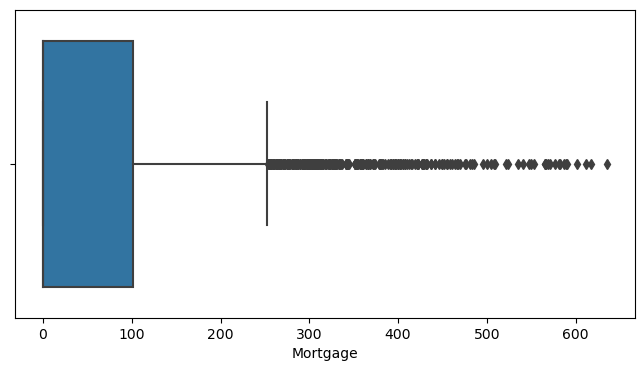

In [21]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Mortgage',data=df)

<Axes: xlabel='CCAvg'>

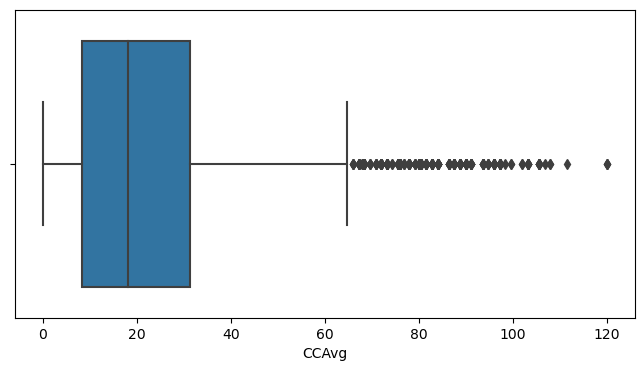

In [22]:
plt.figure(figsize=(8,4))
sns.boxplot(x='CCAvg',data=df)

In [23]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1 

In [24]:
print(IQR)

Experience              19.5
Income                  59.0
ZIP Code              2697.0
Family                   2.0
CCAvg                   22.8
Education                2.0
Mortgage               101.0
Personal Loan            0.0
Securities Account       0.0
CD Account               0.0
Online                   1.0
CreditCard               1.0
dtype: float64


In [25]:
detected_mask = (df < (Q1 - 3 * IQR)) | (df > (Q3 + 3 * IQR))

In [26]:
detected_mask.head()

,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In these **detected outlier dataframe** , we will consider only :
    <br> - `Income`
    <br> - `Experience` 
    <br> - `CCAVG`
    <br> - `Mortgage`
   
The rest is either:
    <br> - `catagorical features` as Education and Family
    <br> - `encoded features` as CreditCard, Online, CD Account, Securities Account 

In [27]:
valid_features_mask = detected_mask[['Experience','Mortgage', 'CCAvg', 'Income']] 

In [28]:
valid_features_mask #mask for certain features

,Experience,Mortgage,CCAvg,Income
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
4995,False,False,False,False
4996,False,False,False,False
4997,False,False,False,False
4998,False,False,False,False


In [29]:
features = ['Experience', 'Mortgage', 'CCAvg', 'Income']

for feature in features:
    rows_to_drop = df[valid_features_mask[feature]].index
    df.drop(rows_to_drop, inplace=True)
    print(f'{feature} {rows_to_drop}')

Experience Index([], dtype='int64')
Mortgage Index([  42,   59,  303,  354,  365,  459,  473,  479,  570,  684,  782,  952,
       1111, 1167, 1273, 1277, 1359, 1372, 1623, 1674, 1716, 1783, 1789, 1937,
       2041, 2217, 2319, 2382, 2394, 2443, 2541, 2653, 2668, 2687, 2714, 2753,
       2769, 2812, 2841, 2934, 2946, 2956, 2989, 3012, 3021, 3357, 3373, 3411,
       3470, 3472, 3515, 3571, 3608, 3662, 3702, 3776, 3945, 4016, 4238, 4240,
       4294, 4345, 4422, 4541, 4585, 4655, 4672, 4812, 4842, 4859],
      dtype='int64')
CCAvg Index([   9,  614,  787,  881,  917, 1339, 1354, 1797, 2101, 2337, 2447, 2952,
       2988, 3312, 3384, 3804, 3822, 3943, 4156, 4225, 4414, 4603, 4937],
      dtype='int64')
Income Index([], dtype='int64')


C:\Users\user\AppData\Local\Temp\ipykernel_30596\586850689.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rows_to_drop = df[valid_features_mask[feature]].index
C:\Users\user\AppData\Local\Temp\ipykernel_30596\586850689.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rows_to_drop = df[valid_features_mask[feature]].index


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4854 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Experience          4854 non-null   int64  
 1   Income              4854 non-null   int64  
 2   ZIP Code            4854 non-null   int64  
 3   Family              4854 non-null   int64  
 4   CCAvg               4854 non-null   float64
 5   Education           4854 non-null   int64  
 6   Mortgage            4854 non-null   int64  
 7   Personal Loan       4854 non-null   int64  
 8   Securities Account  4854 non-null   int64  
 9   CD Account          4854 non-null   int64  
 10  Online              4854 non-null   int64  
 11  CreditCard          4854 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 493.0 KB


In [31]:
df.head()

,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,49,91107,4,19.2,1,0,0,1,0,0,0
1,19,34,90089,3,18.0,1,0,0,1,0,0,0
2,15,11,94720,1,12.0,1,0,0,0,0,0,0
3,9,100,94112,1,32.4,2,0,0,0,0,0,0
4,8,45,91330,4,12.0,2,0,0,0,0,0,1


---
---

# Train | Test split

In [32]:
X = df.drop('Personal Loan',axis=1)
y = df['Personal Loan']

In [33]:
#TRAin TEST SPLIT
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

A `tree-based` model won't suffer from unscaled data, because scale doesn't affect them at all,
but if you perform Gradient Boosting on Classifiers, the scale does affect learning.

The source: https://stackabuse.com/feature-scaling-data-with-scikit-learn-for-machine-learning-in-python/

---

## Creating the model

In [34]:
from sklearn.tree import DecisionTreeClassifier
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to 

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
tree_param = {'criterion':['gini','entropy'],
            'max_depth':range(1,10),
            'min_samples_leaf':range(1,10),
            'min_samples_split':range(1,10)
           }

In [37]:
model = DecisionTreeClassifier()

In [38]:
# LINK: https://plainenglish.io/blog/hyperparameter-tuning-of-decision-tree-classifier-using-gridsearchcv-2a6ebcaffeda
grid_model = GridSearchCV(estimator=model,
                          param_grid=tree_param, 
                          cv=10,                           #cross_validation
                          verbose=1,                       #low verbosity
                          n_jobs=-1)                       # jobs to be done in parallel (-1 means on all processors)

In [39]:
grid_model.fit(X_train,y_train)

Fitting 10 folds for each of 1458 candidates, totalling 14580 fits


C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1620 fits failed out of a total of 14580.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1620 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\user\anaconda3\Lib\site-package

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [40]:
y_pred = grid_model.predict(X_test)

In [41]:
grid_model.best_score_

0.9858736769043901

In [42]:
grid_model.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 8,
 'min_samples_split': 3}

link: https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/

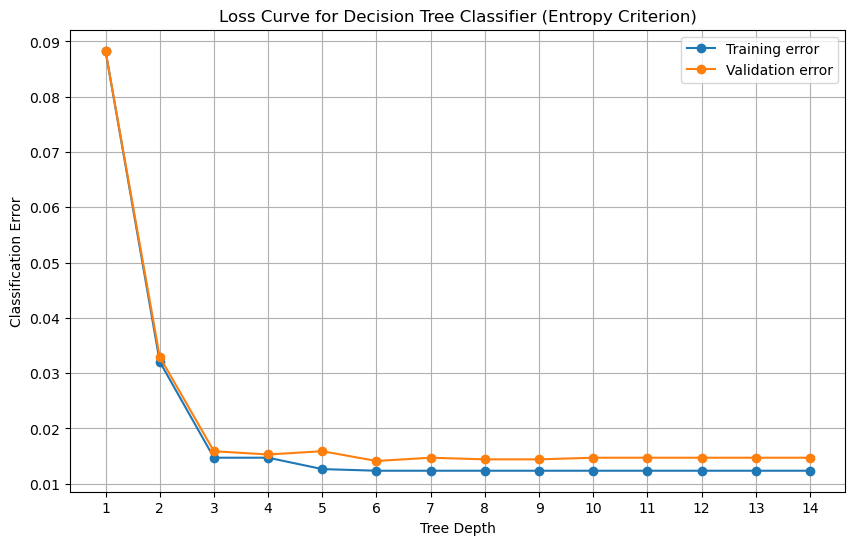

In [43]:
train_errors = []
val_errors = []

# Define range of depths to try
depths = range(1, 15)

# Iterate over each depth
for depth in depths:
    # Create decision tree classifier with given parameters
    clf = DecisionTreeClassifier(criterion='gini', max_depth=depth, min_samples_leaf=8, min_samples_split=2, random_state=42)
    
    # Perform cross-validation with 10 folds
    cv_scores = cross_val_score(clf, X_train, y_train, cv=10)
    
    # Calculate average training and validation error for this depth
    val_error = 1 - np.mean(cv_scores)
    train_error = 1 - clf.fit(X_train, y_train).score(X_train, y_train)
    
    # Append errors to lists
    train_errors.append(train_error)
    val_errors.append(val_error)

# Plotting the loss curve
plt.figure(figsize=(10, 6))
plt.plot(depths, train_errors, label='Training error', marker='o')
plt.plot(depths, val_errors, label='Validation error', marker='o')
plt.title('Loss Curve for Decision Tree Classifier (Entropy Criterion)')
plt.xlabel('Tree Depth')
plt.ylabel('Classification Error')
plt.xticks(depths)
plt.legend()
plt.grid(True)
plt.show()

A plot of learning curves shows a good fit if:

The plot of training loss decreases to a point of stability.
The plot of validation loss decreases to a point of stability and has a small gap with the training loss.

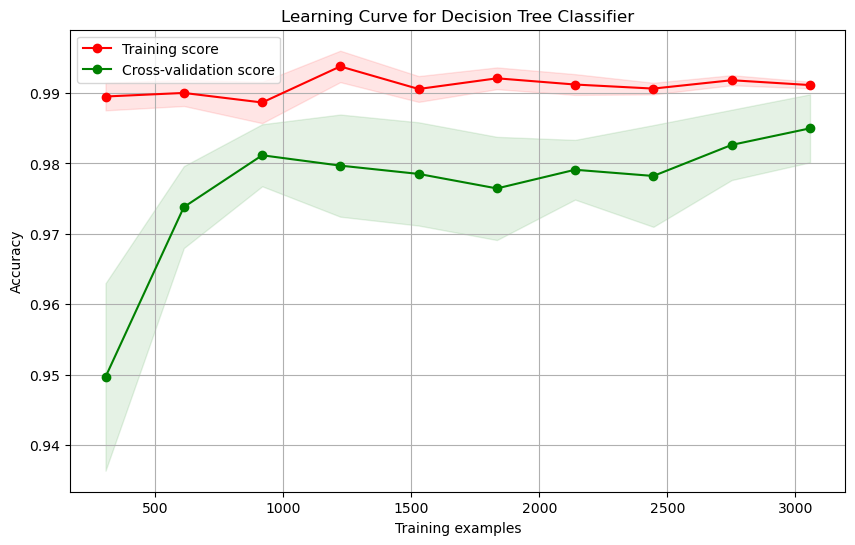

In [44]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=3, min_samples_split=2, random_state=42)

# Define training sizes (10 evenly spaced values between 10% and 100% of the training set)
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate learning curves
train_sizes, train_scores, val_scores = learning_curve(
    clf, X_train, y_train, train_sizes=train_sizes, cv=10, scoring='accuracy')

# Calculate mean and standard deviation of training and testing scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve for Decision Tree Classifier")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

---
---

## Evaluation

In [45]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

In [46]:
 confusion_matrix(y_test,y_pred)

array([[1315,    6],
       [  19,  117]], dtype=int64)

confusion matrix
[[1315    6]
 [  19  117]]


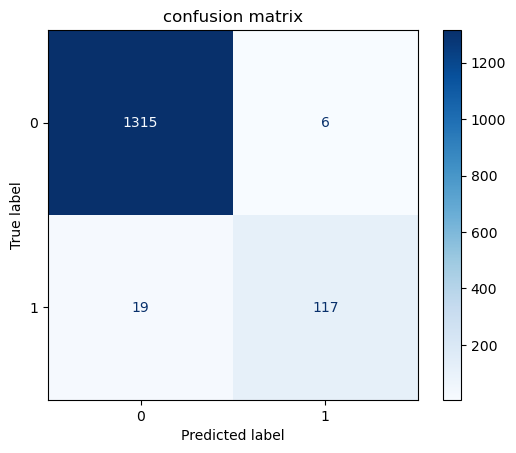

In [47]:
# The source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
disp = ConfusionMatrixDisplay.from_estimator(
    grid_model,
    X_test,
    y_test,
    cmap=plt.cm.Blues,
)
disp.ax_.set_title('confusion matrix')

print('confusion matrix')
print(disp.confusion_matrix)

plt.show()

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1321
           1       0.95      0.86      0.90       136

    accuracy                           0.98      1457
   macro avg       0.97      0.93      0.95      1457
weighted avg       0.98      0.98      0.98      1457



In [49]:
from sklearn.tree import plot_tree

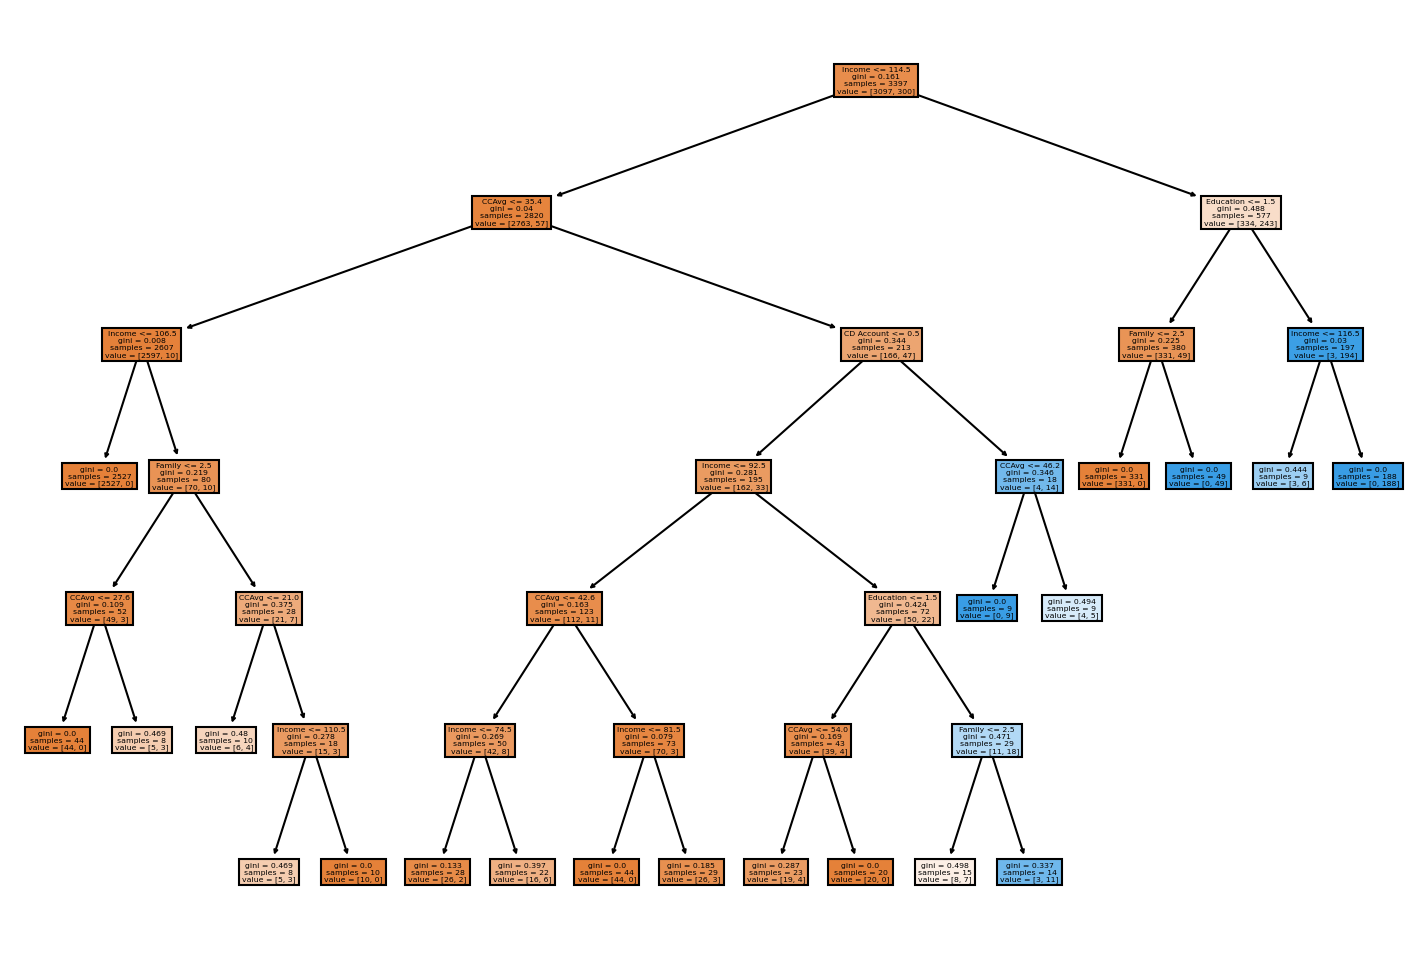

In [50]:
# Extract the best estimator (best model) from Grid Search
best_dt = grid_model.best_estimator_
plt.figure(figsize=(12,8),dpi=150)
plot_tree(best_dt,filled=True,feature_names=X_train.columns.tolist());

---
---

## saving my model

In [51]:
from joblib import dump, load

In [52]:
dump(grid_model, 'my_decision_tree_model.joblib') 

['my_decision_tree_model.joblib']

In [53]:
import tkinter as tk
from tkinter import messagebox

In [54]:
class PredictionGUI:
    def __init__(self, master, feature_names, model_path):
        self.master = master
        self.feature_names = feature_names
        self.model = load(model_path)

        self.entries = []
        self.create_widgets()
        
    def create_widgets(self):
        tk.Label(self.master, text="Enter values for prediction:").grid(row=0, columnspan=2)

        for i, feature_name in enumerate(self.feature_names):
            tk.Label(self.master, text=feature_name).grid(row=i+1, column=0, sticky="e")
            entry = tk.Entry(self.master)
            entry.grid(row=i+1, column=1, padx=5, pady=5)
            self.entries.append(entry)

        predict_button = tk.Button(self.master, text="Predict", command=self.predict)
        predict_button.grid(row=len(self.feature_names)+1, columnspan=2, pady=10)
        
        
    def predict(self):
        inputs = [float(entry.get()) for entry in self.entries]
        inputs = np.array(inputs).reshape(1, -1)
    
        df1 = pd.DataFrame(inputs, columns=self.feature_names)  # Create DataFrame with correct column names
        # Convert 'CCAvg' to annual spending
        df1['CCAvg'] = df1['CCAvg'] * 12
        # Drop the 'Age' column
        df1.drop('Age', axis=1, inplace=True)
        df1.drop('ID', axis=1, inplace=True)

        prediction = self.model.predict(df1)
        if prediction[0] == 0:
            messagebox.showinfo("Prediction", f"The predicted output is: {prediction[0]}, which means the likelihood of a liability customer buying personal loans is negative")
        else:
            messagebox.showinfo("Prediction", f"The predicted output is: {prediction[0]}, which means the likelihood of a liability customer buying personal loans is positive")

In [55]:
df.head(5)

,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,49,91107,4,19.2,1,0,0,1,0,0,0
1,19,34,90089,3,18.0,1,0,0,1,0,0,0
2,15,11,94720,1,12.0,1,0,0,0,0,0,0
3,9,100,94112,1,32.4,2,0,0,0,0,0,0
4,8,45,91330,4,12.0,2,0,0,0,0,0,1


In [56]:
def main():
    feature_names = ['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']  # Replace with your feature names
    model_path = 'my_decision_tree_model.joblib'  # Replace with your model file path

    root = tk.Tk()
    root.title("Prediction GUI")
    gui = PredictionGUI(root,feature_names , model_path)
    root.mainloop()

In [ ]:
main()